In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("Electric_Production.csv", index_col = 0)

In [3]:
data.isna().sum()

IPG2211A2N    0
dtype: int64

In [4]:
data.head()


,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [7]:
data.columns = ["Energy Production"]

In [8]:
data.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


<Axes: xlabel='DATE'>

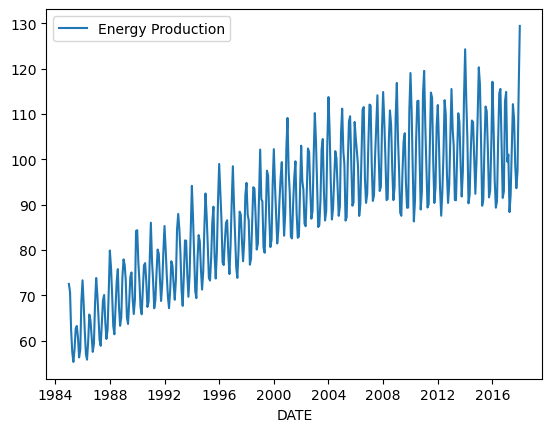

In [9]:
sns.lineplot(data = data)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics : {}".format(result[0]))
    print("p- value: {}".format(result[1]))
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis , reject the null hypothesis")
    else:
        print("weakened evidence against null hypothesis , time series has a unit root , indicating it is non-stationary")

In [12]:
adf_test(data["Energy Production"])

ADF Statistics : -2.25699035004723
p- value: 0.18621469116587275
weakened evidence against null hypothesis , time series has a unit root , indicating it is non-stationary


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

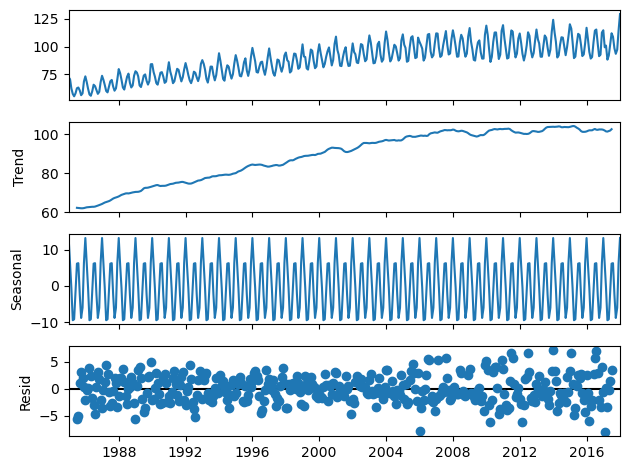

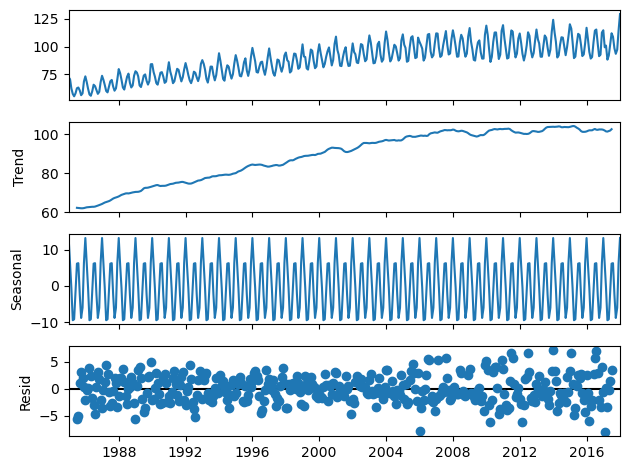

In [14]:
result = seasonal_decompose(data , model = "additive")
result.plot()

In [15]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pmdarima.arima import auto_arima

In [17]:
stepwise_model = auto_arima(data , start_p = 1 , start_q = 1 , max_p = 3 , nax_q = 3 , m = 12 , start_P = 0 , seasonal = True , d = 1 , D = 1 , trace=True , error_action = "ignore" , suppress_warnings = True , stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1785.652, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.21 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1787.226, Time=0.40 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1786.885, Time=1.13 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1872.182, Time=0.32 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=1.11 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=1.16 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1773.643, Time=0.85 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1814.635, Time=1.08 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1835.292, Time=1.07 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=1772.091, Time=2.03 sec
 ARIMA(1,1,2)(2,1,2)[12]

In [18]:
# the aic value will allow us how well a model fits the data and takes into account the complexity of a model , so model that have a better fit 
# while using fewer features will recieve a better aic score then similar models will utilize more features 

In [19]:
print(stepwise_model.aic())

1770.2158987939822


In [21]:
len(test)

25

In [22]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [41]:
future_forcast = stepwise_model.predict(n_periods = 25)

In [42]:
data.tail()

,Energy Production
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [44]:
future_forcast

2016-01-01    114.747024
2016-02-01    109.014732
2016-03-01    100.887944
2016-04-01     89.695529
2016-05-01     91.593154
2016-06-01    102.455931
2016-07-01    112.011263
2016-08-01    110.807565
2016-09-01    100.403517
2016-10-01     91.782309
2016-11-01     94.889569
2016-12-01    108.158498
2017-01-01    117.759800
2017-02-01    109.517461
2017-03-01    101.645824
2017-04-01     90.227562
2017-05-01     92.031170
2017-06-01    102.427719
2017-07-01    111.496264
2017-08-01    110.374045
2017-09-01    100.112189
2017-10-01     91.946156
2017-11-01     96.200343
2017-12-01    109.436428
2018-01-01    118.905649
Freq: MS, dtype: float64

In [47]:
future_forcast = pd.DataFrame(future_forcast , index = test.index , columns = ["Prediction"])

In [52]:
df = pd.concat([test , future_forcast] , axis = 1)

In [53]:
from sklearn.metrics import mean_squared_error

In [56]:
rmse = np.sqrt(mean_squared_error(df["Energy Production"] , df["Prediction"]))

In [58]:
rmse

3.8177773523519787

In [60]:
index_future_dates = pd.date_range(start ="2018-01-01" , end = "2018-01-10")

In [61]:
pred = stepwise_model.predict(start = len(test) , end = len(future_forcast)+10,typ="levels").rename("ARIMA Predictions")

In [62]:
pred.index = index_future_dates

In [63]:
pred

2018-01-01    114.747024
2018-01-02    109.014732
2018-01-03    100.887944
2018-01-04     89.695529
2018-01-05     91.593154
2018-01-06    102.455931
2018-01-07    112.011263
2018-01-08    110.807565
2018-01-09    100.403517
2018-01-10     91.782309
Freq: D, Name: ARIMA Predictions, dtype: float64